In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas_datareader.data as web
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import style
import sklearn.metrics
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [5]:
style.use('ggplot')

In [6]:
# get 2011-2019 data to train our model
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2019,12,31)
df = web.DataReader("TSLA", 'yahoo', start, end)


In [7]:
# get 2020 data to test our model on
start = datetime.datetime(2020,1,2)
end = datetime.date.today()
test_df = web.DataReader("TSLA", 'yahoo', start, end)

In [8]:
# sort by date
df = df.sort_values('Date')
test_df = test_df.sort_values('Date')

In [10]:
# fix the date  
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
test_df.reset_index(inplace=True)
test_df.set_index("Date", inplace=True)
df.head(30)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500,3.222
2010-07-07,3.326,2.996,3.280,3.160,34608500,3.160
2010-07-08,3.504,3.114,3.228,3.492,38557000,3.492
2010-07-09,3.580,3.310,3.516,3.480,20253000,3.480
2010-07-12,3.614,3.400,3.590,3.410,11012500,3.410


In [12]:
# change the dates into ints for training
dates_df = df.copy()
dates_df = dates_df.reset_index()

In [13]:
# Store the original dates for plotting the predicitons
org_dates = dates_df['Date']

In [14]:
# convert to ints
dates_df['Date'] = dates_df['Date'].map(mdates.date2num)

In [15]:
from sklearn.svm import SVR
dates = dates_df['Date'].values

In [16]:
#Open-----------------------------------------------------
prices1 = df['Open'].values

In [17]:
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices1 = np.reshape(prices1, (len(prices1), 1))


In [18]:
svr_rbf = SVR(kernel= 'rbf', C = 12, gamma= 0.03)
svr_rbf.fit(dates, prices1)


C:\Users\PREHA MADAAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=12, gamma=0.03)

In [19]:
y1_pred = svr_rbf.predict(dates);

In [23]:
def mean_absolute_percentage_error_calc(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.divide(np.absolute(y_pred - y_true), y_true))

In [24]:
print("MAPE for Open : ", mean_absolute_percentage_error_calc(prices1, y1_pred))


MAPE for Open :  2.0092339354396906


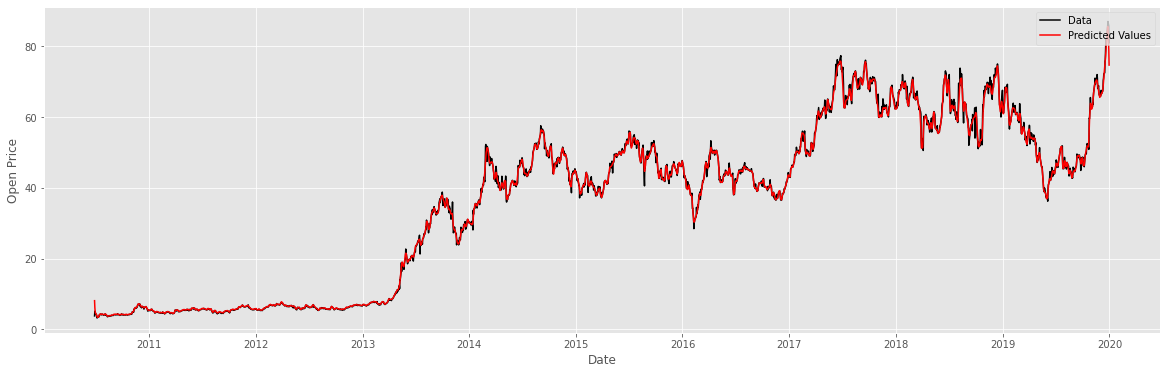

In [25]:
plt.figure(figsize = (20,6))
plt.plot(dates, prices1, color= 'black', label= 'Data')
plt.plot(org_dates, y1_pred, color= 'red', label= 'Predicted Values') 
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend(loc = 'upper right')
plt.show()


## -----------------------------------------------------

In [29]:
#Close
prices2 = df['Close'].values

In [30]:
#Convert to 1d Vector
prices2 = np.reshape(prices2, (len(prices2), 1))

In [31]:
svr_rbf = SVR(kernel= 'rbf', C = 12, gamma= 0.03)
svr_rbf.fit(dates, prices2)


C:\Users\PREHA MADAAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=12, gamma=0.03)

In [32]:
y2_pred = svr_rbf.predict(dates);


In [33]:
print("MAPE for Close : ", mean_absolute_percentage_error_calc(prices2, y2_pred))

MAPE for Close :  2.0123584484971744


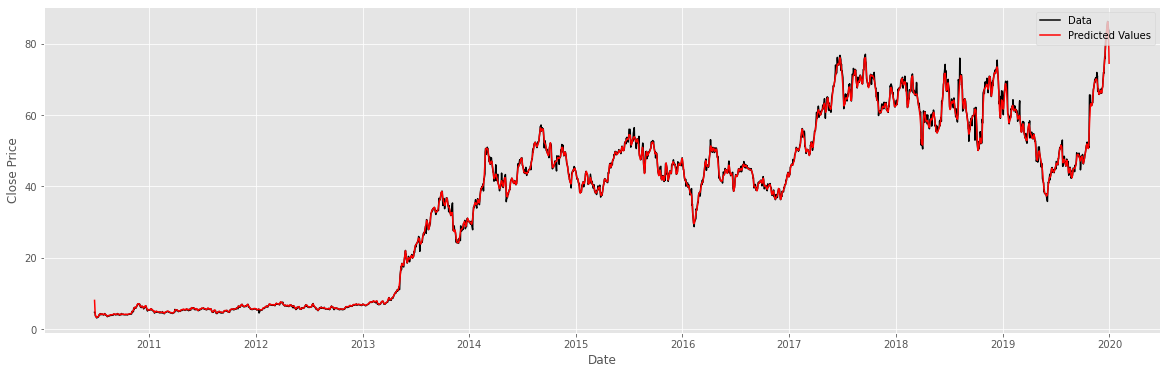

In [34]:
plt.figure(figsize = (20,6))
plt.plot(dates, prices2, color= 'black', label= 'Data')
plt.plot(org_dates, y2_pred, color= 'red', label= 'Predicted Values') 
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc = 'upper right')
plt.show()

In [35]:
#High
prices3 = df['High'].values


In [36]:
#Convert to 1d Vector
prices3 = np.reshape(prices3, (len(prices3), 1))

In [37]:
svr_rbf = SVR(kernel= 'rbf', C = 12, gamma= 0.03)
svr_rbf.fit(dates, prices3)

C:\Users\PREHA MADAAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=12, gamma=0.03)

In [38]:
y3_pred = svr_rbf.predict(dates);

In [39]:

print("MAPE for High : ", mean_absolute_percentage_error_calc(prices3, y3_pred))


MAPE for High :  1.9990212682063722


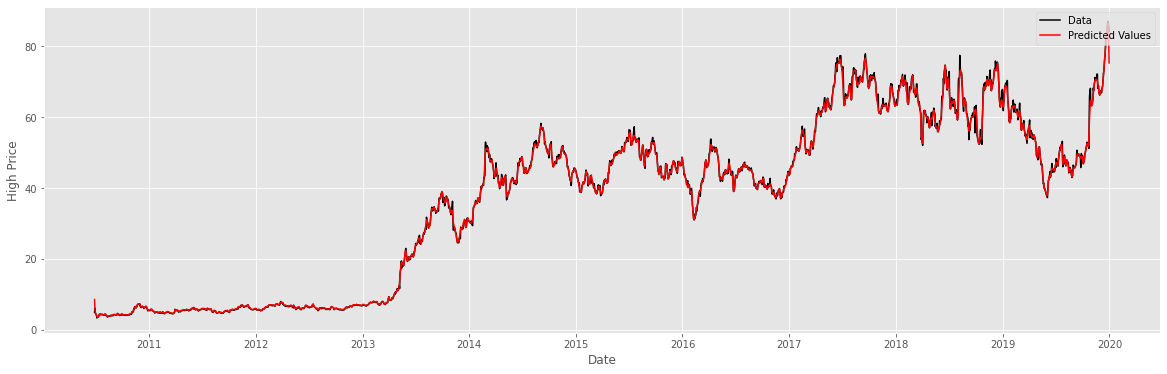

In [40]:
plt.figure(figsize = (20,6))
plt.plot(dates, prices3, color= 'black', label= 'Data')
plt.plot(org_dates, y3_pred, color= 'red', label= 'Predicted Values') 
plt.xlabel('Date')
plt.ylabel('High Price')
plt.legend(loc = 'upper right')
plt.show()

In [41]:
prices4 = df['Low'].values

In [42]:
#Convert to 1d Vector
prices4 = np.reshape(prices4, (len(prices4), 1))

In [43]:
svr_rbf = SVR(kernel= 'rbf', C = 12, gamma= 0.03)
svr_rbf.fit(dates, prices4)

C:\Users\PREHA MADAAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=12, gamma=0.03)

In [44]:
y4_pred = svr_rbf.predict(dates);

In [45]:

print("MAPE for Low : ", mean_absolute_percentage_error_calc(prices4, y4_pred))

MAPE for Low :  2.0242926764700395


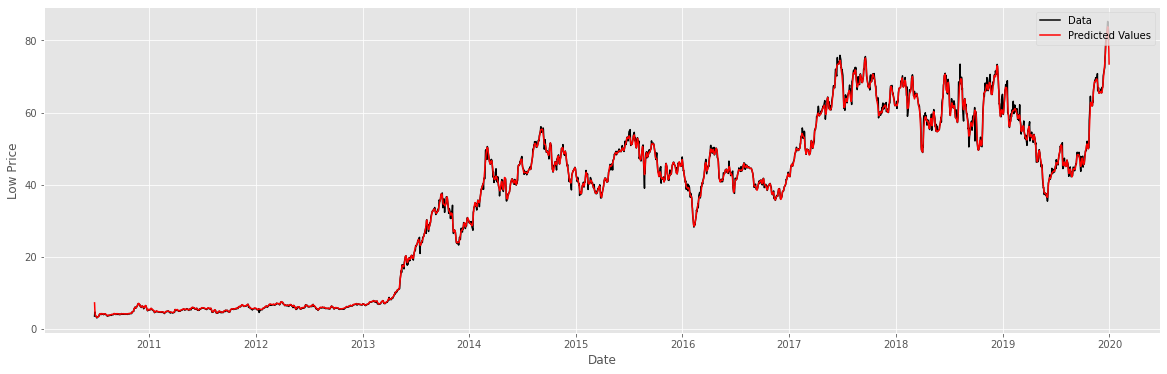

In [46]:
plt.figure(figsize = (20,6))
plt.plot(dates, prices4, color= 'black', label= 'Data', )
plt.plot(org_dates, y4_pred, color= 'red', label= 'Predicted Values',) 
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend(loc = 'upper right')
plt.show()

In [47]:

print('r2 - Low', sklearn.metrics.r2_score(prices4, y4_pred, sample_weight = None, multioutput='raw_values'))

print('r2 - High', sklearn.metrics.r2_score(prices3, y3_pred, sample_weight = None, multioutput='raw_values'))

print('r2 - Close', sklearn.metrics.r2_score(prices2, y2_pred, sample_weight = None, multioutput='raw_values'))

print('r2 - Open', sklearn.metrics.r2_score(prices1, y1_pred, sample_weight = None, multioutput='raw_values'))


r2 - Low [0.99892715]
r2 - High [0.99897479]
r2 - Close [0.99871066]
r2 - Open [0.99874905]


In [57]:
print("Mean absolute error-Low(MAE)  :%f" % mean_absolute_error(prices4, y4_pred))
print("Mean absolute error-High(MAE) :%f" % mean_absolute_error(prices3, y3_pred))
print("Mean absolute error-Close(MAE):%f" % mean_absolute_error(prices2, y2_pred))
print("Mean absolute error-Open(MAE) :%f" % mean_absolute_error(prices1, y1_pred))

Mean absolute error-Low(MAE)  :0.392590
Mean absolute error-High(MAE) :0.377100
Mean absolute error-Close(MAE):0.416773
Mean absolute error-Open(MAE) :0.432588


In [59]:
print("Mean squared error (MSE)-Low  :%f" % mean_squared_error(prices4, y4_pred))
print("Mean squared error (MSE)-High :%f" % mean_squared_error(prices3, y3_pred))
print("Mean squared error (MSE)-Close:%f" % mean_squared_error(prices2, y2_pred))
print("Mean squared error (MSE)-Open :%f" % mean_squared_error(prices1, y1_pred))

Mean squared error (MSE)-Low  :0.543810
Mean squared error (MSE)-High :0.553490
Mean squared error (MSE)-Close:0.675762
Mean squared error (MSE)-Open :0.654942
